##Plan to analyze relation between the number of properties for rent by each host in relation to the price per night charged.  Each borough is separated out to control for location effects on price.  Additionally, within each borough the room type is separated for the same reason. 
#Notes on development. This was initally ran with a DF divided by borough then sub typed by room.  Analysis ran on ever relation for room type v. borough. There was no relation and the plots were very difficult to read since so many of the host listings were 1, so I then exluded all hosts with only 1 listing.  That is the below analysis and set up.  There was so much duplicative code that I took out the intial analysis that included one property only.  Even with that excluded there is not a relationship

In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
plt.style.use('seaborn')

In [2]:
#Read in cleaned file
data = pd.read_csv('../listings.csv')

In [3]:
#Create data frame with only columns I want to keep
MainDF1=data[['host_id','room_type','neighbourhood_group','price', 'calculated_host_listings_count']]
MainDF=MainDF1[MainDF1['calculated_host_listings_count']>1]

In [4]:
#Create data frame for each Bororough
BrooklynDF=MainDF[MainDF["neighbourhood_group"]=="Brooklyn"]

BronxDF=MainDF[MainDF["neighbourhood_group"]=="Bronx"]

ManhattanDF=MainDF[MainDF["neighbourhood_group"]=="Manhattan"]

QueensDF=MainDF[MainDF["neighbourhood_group"]=="Queens"]

StatenIslandDF=MainDF[MainDF["neighbourhood_group"]=="Staten Island"]
#Length of each listing count excluding only 1 property count listings
print(len(BrooklynDF['calculated_host_listings_count']))
print(len(BronxDF['calculated_host_listings_count']))
print(len(ManhattanDF['calculated_host_listings_count']))
print(len(QueensDF['calculated_host_listings_count']))
print(len(StatenIslandDF['calculated_host_listings_count']))




4857
450
6483
2334
138


In [5]:
#Create DF's for Brooklyn rentals
PrivateBrooklyn = BrooklynDF[BrooklynDF["room_type"]=='Private room']
SharedBrooklyn=BrooklynDF[BrooklynDF["room_type"]=='Shared room']
HotelBrooklyn=BrooklynDF[BrooklynDF["room_type"]=='Hotel room']
HouseBrooklyn=BrooklynDF[BrooklynDF["room_type"]=='Entire home/apt']
#Are there subsets of housing to be removed due to low numbers? Yes, do not calculate Hotels in Brooklyn
print(len(PrivateBrooklyn['calculated_host_listings_count']))
print(len(SharedBrooklyn['calculated_host_listings_count']))
print(len(HouseBrooklyn['calculated_host_listings_count']))
print(len(HotelBrooklyn['calculated_host_listings_count']))


2942
163
1743
9


In [6]:
#Create DF's for Bronx rentals
PrivateBronx = BronxDF[BronxDF["room_type"]=='Private room']
SharedBronx=BronxDF[BronxDF["room_type"]=='Shared room']
HotelBronx=BronxDF[BronxDF["room_type"]=='Hotel room']
HouseBronx=BronxDF[BronxDF["room_type"]=='Entire home/apt']
#Are there subsets of housing to be removed due to low numbers? Yes, do not calculate Shared Rooms or Hotels for The Bronx
print(len(PrivateBronx['calculated_host_listings_count']))
print(len(SharedBronx['calculated_host_listings_count']))
print(len(HotelBronx['calculated_host_listings_count']))
print(len(HouseBronx['calculated_host_listings_count']))

306
9
0
135


In [7]:
#Create DF's for Manhattan rentals
PrivateManhattan = ManhattanDF[ManhattanDF["room_type"]=='Private room']
SharedManhattan=ManhattanDF[ManhattanDF["room_type"]=='Shared room']
HotelManhattan=ManhattanDF[ManhattanDF["room_type"]=='Hotel room']
HouseManhattan=ManhattanDF[ManhattanDF["room_type"]=='Entire home/apt']
#Are there subsets of housing to be removed due to low numbers? No, Manhattan has sufficient numbers in all categories
print(len(PrivateManhattan['calculated_host_listings_count']))
print(len(SharedManhattan['calculated_host_listings_count']))
print(len(HouseManhattan['calculated_host_listings_count']))
print(len(HotelManhattan['calculated_host_listings_count']))

2585
147
3535
216


In [8]:
#Create DF's for Queens rentals
PrivateQueens = QueensDF[QueensDF["room_type"]=='Private room']
SharedQueens=QueensDF[QueensDF["room_type"]=='Shared room']
HotelQueens=QueensDF[QueensDF["room_type"]=='Hotel room']
HouseQueens=QueensDF[QueensDF["room_type"]=='Entire home/apt']
#Are there subsets of housing to be removed due to low numbers? Yes, do not calculate Hotels in Queens
print(len(PrivateQueens['calculated_host_listings_count']))
print(len(SharedQueens['calculated_host_listings_count']))
print(len(HouseQueens['calculated_host_listings_count']))
print(len(HotelQueens['calculated_host_listings_count']))

1716
58
552
8


In [9]:
#Create DF's for Staten Island rentals
PrivateStatenIsland = StatenIslandDF[StatenIslandDF["room_type"]=='Private room']
SharedStatenIsland=StatenIslandDF[StatenIslandDF["room_type"]=='Shared room']
HotelStatenIsland=StatenIslandDF[StatenIslandDF["room_type"]=='Hotel room']
HouseStatenIsland=StatenIslandDF[StatenIslandDF["room_type"]=='Entire home/apt']
#Are there subsets of housing to be removed due to low numbers? Yes, only private rooms in Staten Island have sufficient numbers
print(len(PrivateStatenIsland['calculated_host_listings_count']))
print(len(SharedStatenIsland['calculated_host_listings_count']))
print(len(HotelStatenIsland['calculated_host_listings_count']))
print(len(HouseStatenIsland['calculated_host_listings_count']))

91
3
0
44


#The following will plot the price v. listings count for each subset of room type for each Borough and print the r squared value
#0% indicates that the model explains none of the variability of the response data around its mean.
#100% indicates that the model explains all the variability of the response data around its mean.

The r-squared is: 0.0026614994694487853


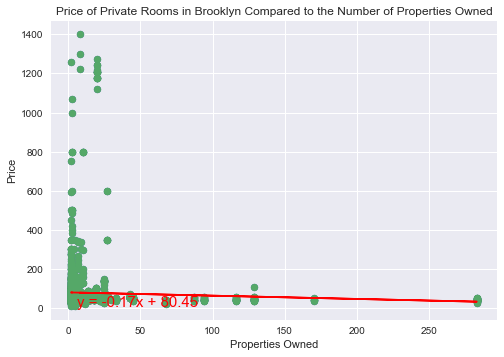

In [10]:
#Plot values and calculate r^2 with line of regression
x_values = PrivateBrooklyn['calculated_host_listings_count']
y_values = PrivateBrooklyn['price']
plt.scatter(x_values,y_values)
plt.title('Price of Private Rooms in Brooklyn Compared to the Number of Properties Owned')
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.06120502087042963


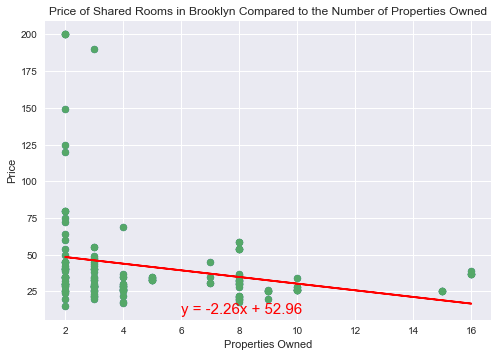

In [11]:
#Plot values and calculate r^2 with line of regression
x_values = SharedBrooklyn['calculated_host_listings_count']
y_values = SharedBrooklyn['price']
plt.scatter(x_values,y_values)
plt.title('Price of Shared Rooms in Brooklyn Compared to the Number of Properties Owned')
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../MW/Brooklyn.Shared.png')
plt.show()

The r-squared is: 0.001175238875057318


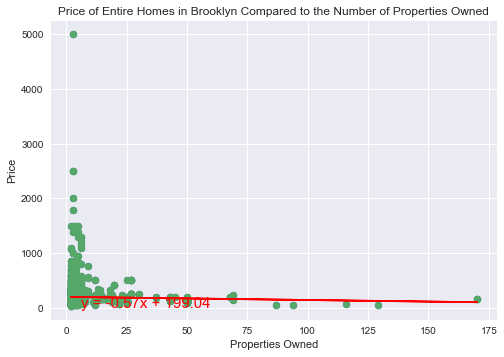

In [12]:
#Plot values and calculate r^2 with line of regression
x_values = HouseBrooklyn['calculated_host_listings_count']
y_values = HouseBrooklyn['price']
plt.scatter(x_values,y_values)
plt.title('Price of Entire Homes in Brooklyn Compared to the Number of Properties Owned')
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

#There are not enough in the Brooklyn Hotel category for analysis

The r-squared is: 0.009539393111887796


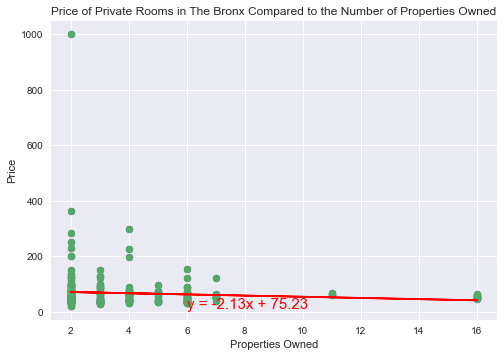

In [13]:
#Plot values and calculate r^2 with line of regression
x_values = PrivateBronx['calculated_host_listings_count']
y_values = PrivateBronx['price']
plt.scatter(x_values,y_values)
plt.title('Price of Private Rooms in The Bronx Compared to the Number of Properties Owned')
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()


The r-squared is: 0.003582587051137618


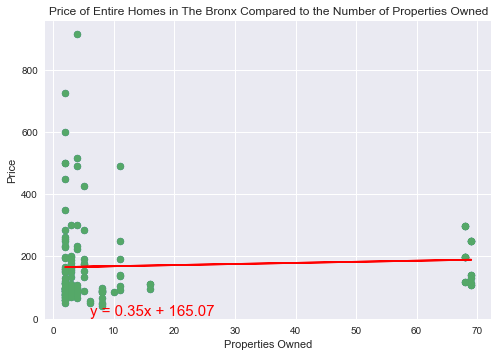

In [14]:
#Plot values and calculate r^2 with line of regression
x_values = HouseBronx['calculated_host_listings_count']
y_values = HouseBronx['price']
plt.scatter(x_values,y_values)
plt.title('Price of Entire Homes in The Bronx Compared to the Number of Properties Owned')
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

#There are not enough in the Bronx Hotel or Shared Rooms categories for analysis

The r-squared is: 0.002538307159606243


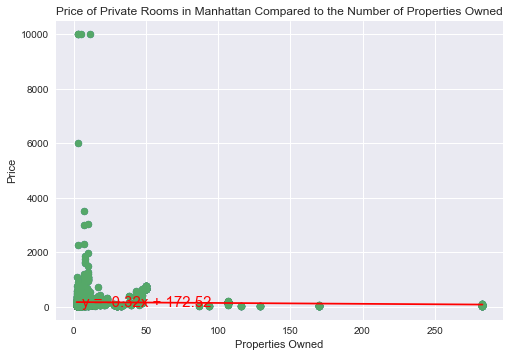

In [15]:
#Plot values and calculate r^2 with line of regression
x_values = PrivateManhattan['calculated_host_listings_count']
y_values = PrivateManhattan['price']
plt.scatter(x_values,y_values)
plt.title('Price of Private Rooms in Manhattan Compared to the Number of Properties Owned')
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.014072097922084807


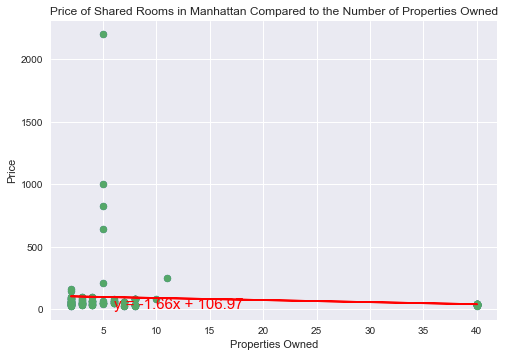

In [16]:
#Plot values and calculate r^2 with line of regression
x_values = SharedManhattan['calculated_host_listings_count']
y_values = SharedManhattan['price']
plt.scatter(x_values,y_values)
plt.title('Price of Shared Rooms in Manhattan Compared to the Number of Properties Owned')
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.00019209031356338005


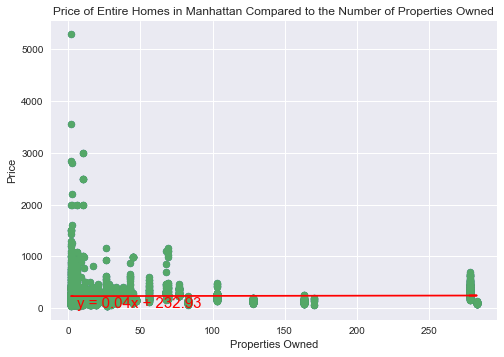

In [17]:
#Plot values and calculate r^2 with line of regression
x_values = HouseManhattan['calculated_host_listings_count']
y_values = HouseManhattan['price']
plt.scatter(x_values,y_values)
plt.title('Price of Entire Homes in Manhattan Compared to the Number of Properties Owned')
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.03227446607522169


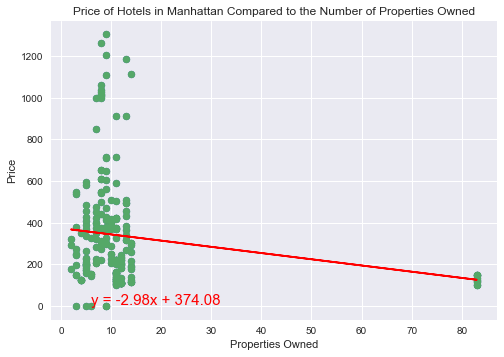

In [18]:
#Plot values and calculate r^2 with line of regression
x_values = HotelManhattan['calculated_host_listings_count']
y_values = HotelManhattan['price']
plt.scatter(x_values,y_values)
plt.title('Price of Hotels in Manhattan Compared to the Number of Properties Owned')
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.05318822379276886


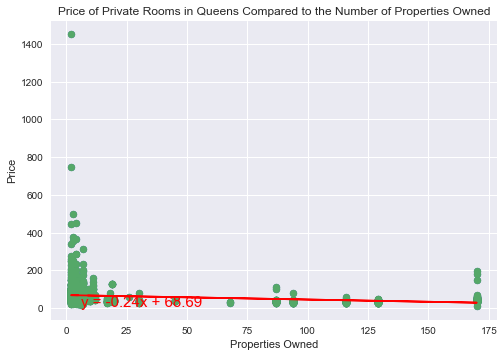

In [19]:
#Plot values and calculate r^2 with line of regression
x_values = PrivateQueens['calculated_host_listings_count']
y_values = PrivateQueens['price']
plt.scatter(x_values,y_values)
plt.title('Price of Private Rooms in Queens Compared to the Number of Properties Owned')
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.002732693340519561


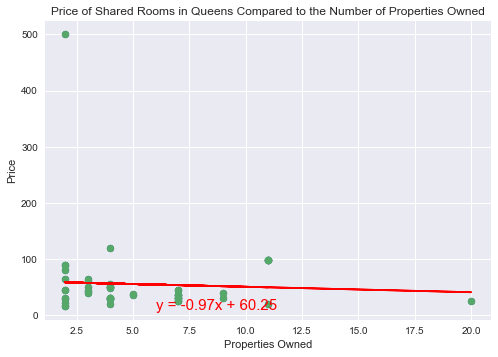

In [20]:
#Plot values and calculate r^2 with line of regression
x_values = SharedQueens['calculated_host_listings_count']
y_values = SharedQueens['price']
plt.scatter(x_values,y_values)
plt.title('Price of Shared Rooms in Queens Compared to the Number of Properties Owned')
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.00015886550523961187


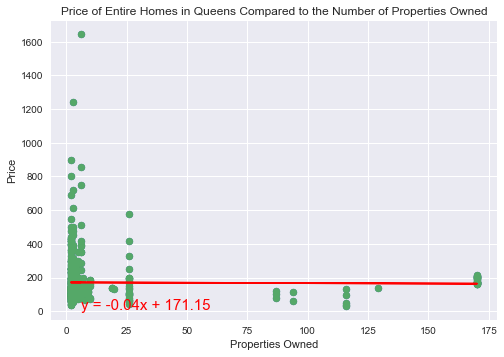

In [21]:
#Plot values and calculate r^2 with line of regression
x_values = HouseQueens['calculated_host_listings_count']
y_values = HouseQueens['price']
plt.scatter(x_values,y_values)
plt.title('Price of Entire Homes in Queens Compared to the Number of Properties Owned')
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

#There are not enough in the Queens Hotel category for analysis

The r-squared is: 0.04078608222180811


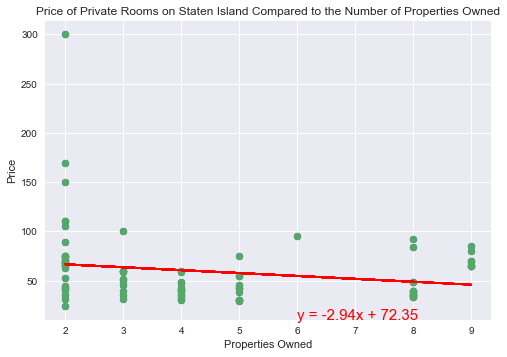

In [22]:
#Plot values and calculate r^2 with line of regression
x_values = PrivateStatenIsland['calculated_host_listings_count']
y_values = PrivateStatenIsland['price']
plt.scatter(x_values,y_values)
plt.title('Price of Private Rooms on Staten Island Compared to the Number of Properties Owned')
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

#There are not enough in the Staten Island Hotel, House or Shared categories for analysis

#The following run an analysis for all of the property types together for each Borough

The r-squared is: 0.004787974020754934


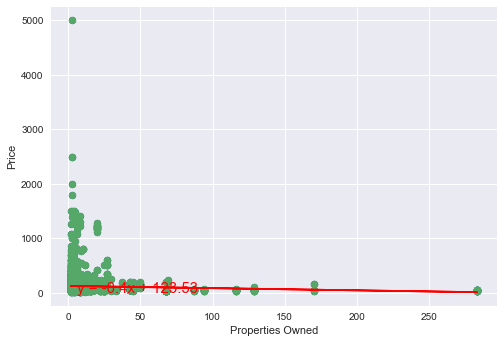

In [25]:
#Plot values and calculate r^2 with line of regression
#This shows the plot for all of Brooklyn with more than one proptery regardless of the type
x_values = BrooklynDF['calculated_host_listings_count']
y_values = BrooklynDF['price']
plt.scatter(x_values,y_values)
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.03176435181871603


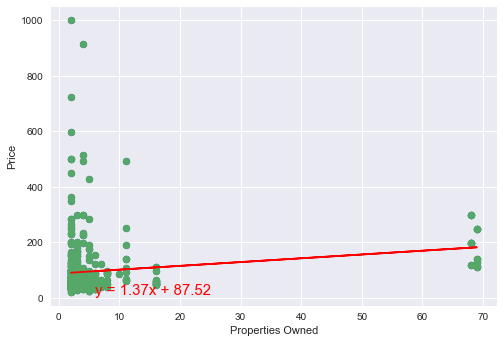

In [26]:
#Plot values and calculate r^2 with line of regression
#This shows the plot for all of the Bronx with more than one proptery regardless of the type
x_values = BronxDF['calculated_host_listings_count']
y_values = BronxDF['price']
plt.scatter(x_values,y_values)
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.00015962811708533227


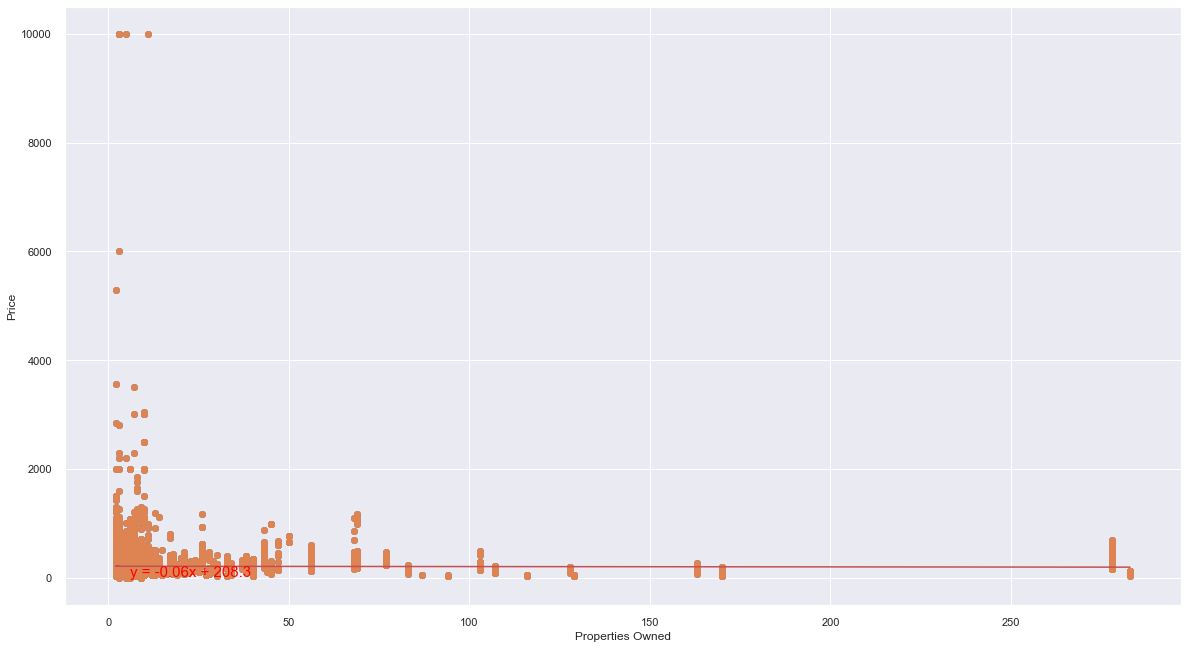

In [34]:
#Plot values and calculate r^2 with line of regression
#This shows the plot for all of Manhattan with more than one proptery regardless of the type
x_values = ManhattanDF['calculated_host_listings_count']
y_values = ManhattanDF['price']
plt.scatter(x_values,y_values)
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()


The r-squared is: 0.03490367438978854


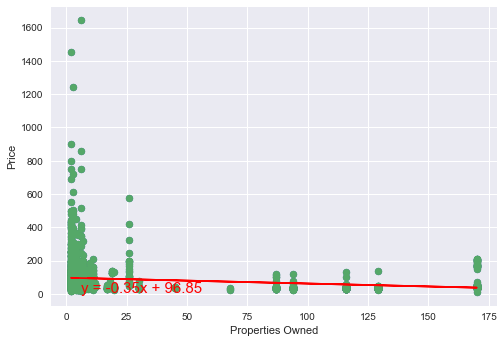

In [28]:
#Plot values and calculate r^2 with line of regression
#This shows the plot for all of Queens with more than one proptery regardless of the type
x_values = QueensDF['calculated_host_listings_count']
y_values = QueensDF['price']
plt.scatter(x_values,y_values)
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.013620006916738338


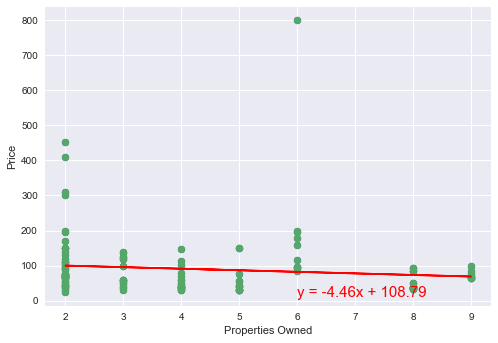

In [29]:
#Plot values and calculate r^2 with line of regression
#This shows the plot for all of Staten Island with more than one proptery regardless of the type
x_values = StatenIslandDF['calculated_host_listings_count']
y_values = StatenIslandDF['price']
plt.scatter(x_values,y_values)
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

#The below are more visually interesting graphs

The r-squared is: 1.1377508037797908e-05


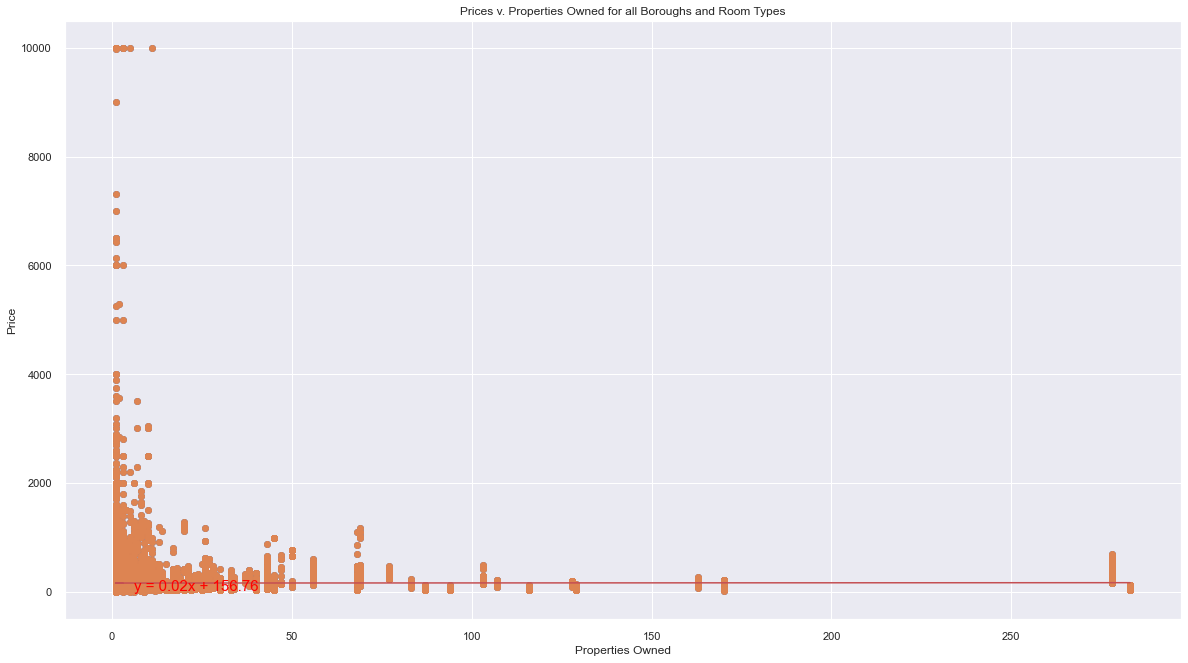

<Figure size 1440x792 with 0 Axes>

In [32]:
x_values = MainDF1['calculated_host_listings_count']
y_values = MainDF1['price']
plt.scatter(x_values,y_values)
plt.xlabel('Properties Owned')
plt.ylabel('Price')
plt.title('Prices v. Properties Owned for all Boroughs and Room Types')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig('../MW/AllRooms.Boroughs.r22.png')

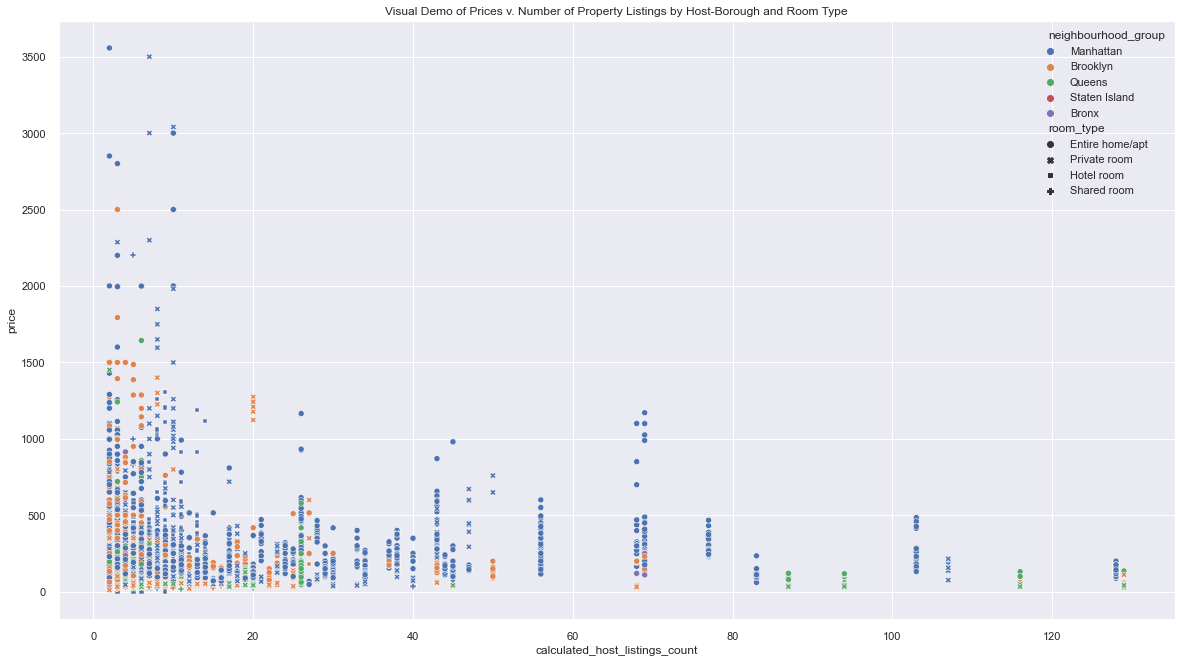

In [31]:
#Cut highest prices and property numbers for easier to look at plot
Main1=MainDF[MainDF['price']<4000]
ModMainDF=Main1[Main1['calculated_host_listings_count']<150]
sns.set(rc={'figure.figsize':(20,11)})
sns.scatterplot(data=ModMainDF,x="calculated_host_listings_count", y="price", hue="neighbourhood_group", style='room_type').set(title='Visual Demo of Prices v. Number of Property Listings by Host-Borough and Room Type')
plt.savefig('../MW/AllRooms.Boroughs.png')

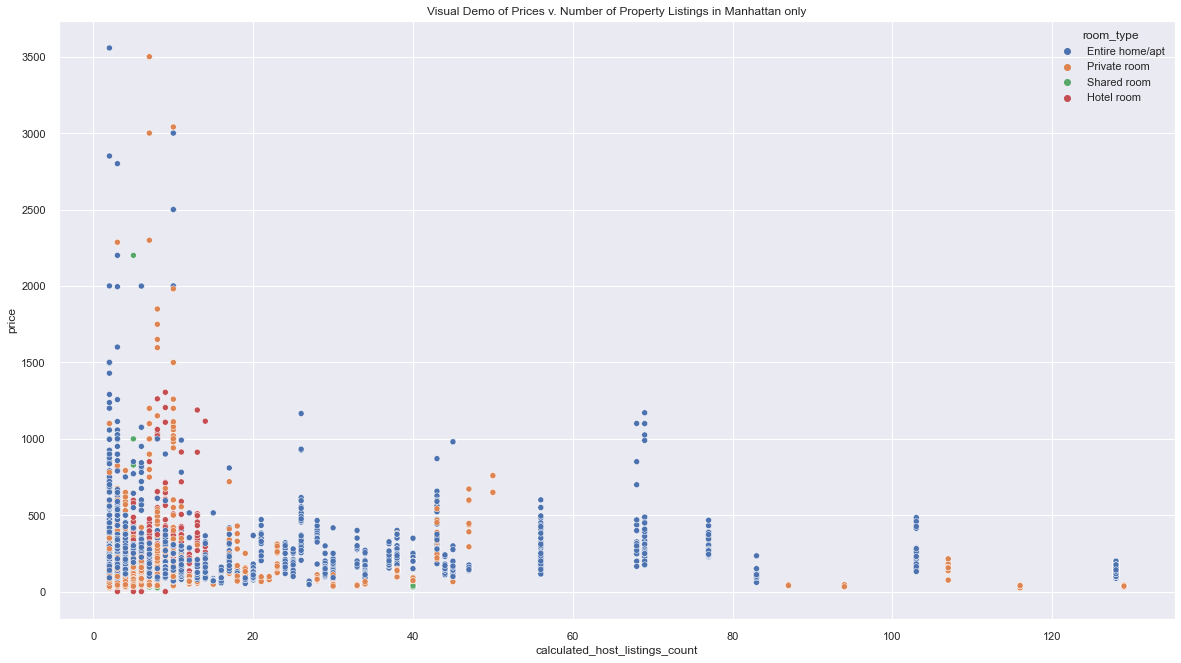

In [33]:
Main1=MainDF[MainDF['price']<4000]
ModMainDF=Main1[Main1['calculated_host_listings_count']<150]
ModManhattan=ModMainDF[ModMainDF['neighbourhood_group']=='Manhattan']
sns.set(rc={'figure.figsize':(20,11)})
sns.scatterplot(data=ModManhattan,x="calculated_host_listings_count", y="price", hue="room_type").set(title='Visual Demo of Prices v. Number of Property Listings in Manhattan only')
plt.savefig('../MW/AllRooms.Manhattan.png')